# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


____
**  numpy and pandas imports**

In [2]:
import numpy as np
import pandas as pd

** Importing visualization libraries and setting %matplotlib inline to visualize inside notebook. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Functions

** The top 5 zipcodes for 911 calls **

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique title codes **

In [11]:
df['title'].nunique()

110

## Creating new features

In [5]:
def get_reason(title):
    return title.split(':')[0]

In [6]:
df['Reason'] = df['title'].apply(lambda x: get_reason(x))
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

**  the most common Reason for a 911 call  **

In [15]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Using seaborn to create a countplot of 911 calls by Reason. **

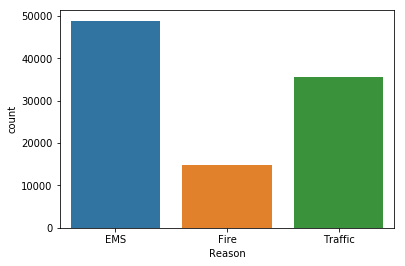

In [17]:
sns.countplot(df['Reason'])

In [37]:
type(df['timeStamp'][0])

pandas._libs.tslib.Timestamp

In [162]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

time = df['timeStamp'].iloc[0]

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Date'] = df['timeStamp'].apply(lambda x: x.date())



In [163]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,NaN,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,NaN,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,NaN,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,NaN,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,NaN,3,2015-12-10


In [65]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [81]:
df['Day of Week'] = df['Day of Week'].map(dmap)


** Creating a countplot of the Day of Week column with the hue based off of the Reason column. **

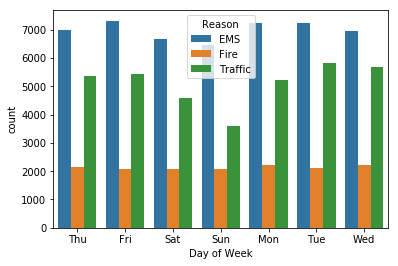

In [84]:
sns.countplot(df['Day of Week'],hue=df['Reason'])

** the same for Month:**

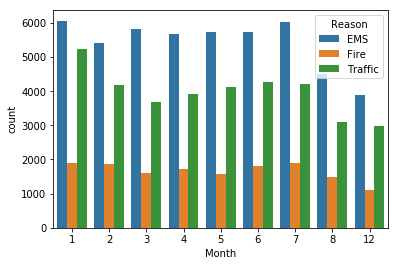

In [85]:
sns.countplot(df['Month'], hue=df['Reason'])

In [124]:
byMonth = df.groupby(df['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,0,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,0,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,0,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,0,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,0,11423


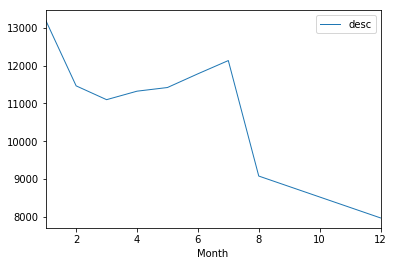

In [105]:
byMonth.plot.line(x=byMonth.index,y='desc',lw=1,)

** the dataframe indicating the count of calls per month. **

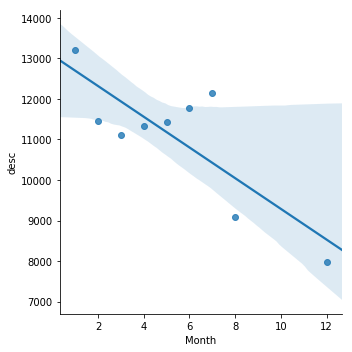

In [141]:
byMonth = byMonth.reset_index()
byMonth['Month']
sns.lmplot(x='Month',y='desc',data = byMonth)

In [164]:
byDate = df.groupby(df['Date']).count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of Week,Date
Date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,0,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,0,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,0,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,0,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,0,447,447


**  a plot of counts of 911 calls.**

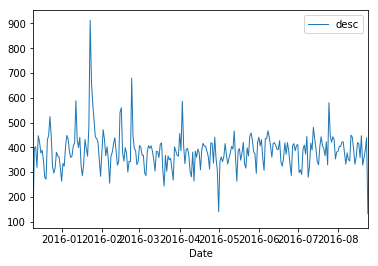

In [165]:
byDate.plot.line(x=byDate.index,y='desc',lw=1)


In [184]:
byDateReason = df.groupby(['Reason',"Date"]).count()
byDateReason.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Reason Date                                                                
EMS    2015-12-10   57   57    57   52     57         57   57    57   57   
       2015-12-11  186  186   186  166    186        186  186   186  186   
       2015-12-12  189  189   189  171    189        189  189   189  189   
       2015-12-13  190  190   190  178    190        190  190   190  190   
       2015-12-14  222  222   222  201    222        222  222   222  222   

                   Hour  Month  Day  Day of Week  
Reason Date                                       
EMS    2015-12-10    57     57    0           57  
       2015-12-11   186    186    0          186  
       2015-12-12   189    189    0          189  
       2015-12-13   190    190    0          190  
       2015-12-14   222    222    0          222

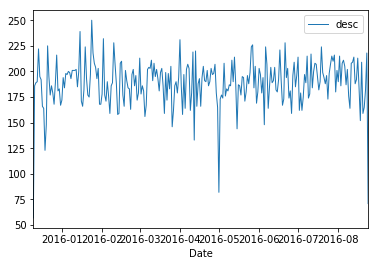

In [189]:
byDateReason.head()
byDateReason[byDateReason.index=='EMS'].plot.line(x='Date',y='desc',lw=1)

**  3 separate plots with each plot representing a Reason for the 911 call**

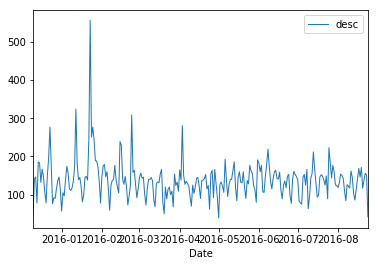

In [190]:
byDateReason[byDateReason.index=='Traffic'].plot.line(x='Date',y='desc',lw=1)

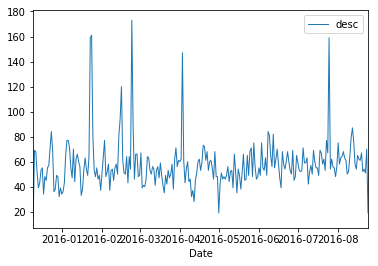

In [191]:
byDateReason[byDateReason.index=='Fire'].plot.line(x='Date',y='desc',lw=1)

In [232]:
mat = df.groupby(['Hour','Day of Week' ]).count()

In [235]:
mat = mat['desc']

In [237]:
mat = mat.unstack(level=0)

In [239]:
mat.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** HeatMap**

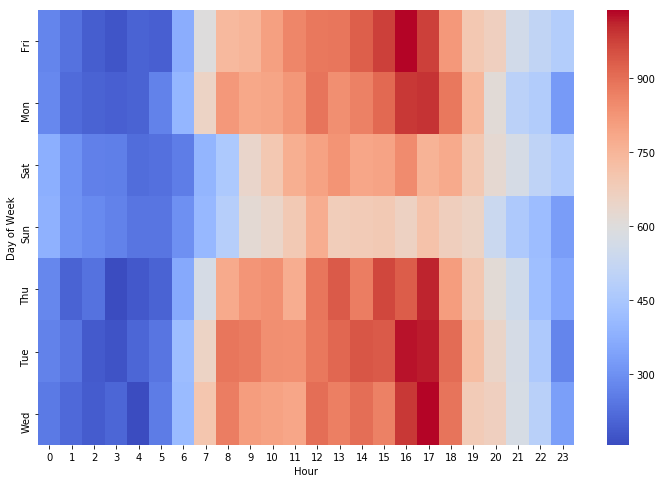

In [242]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data=mat, cmap='coolwarm', )

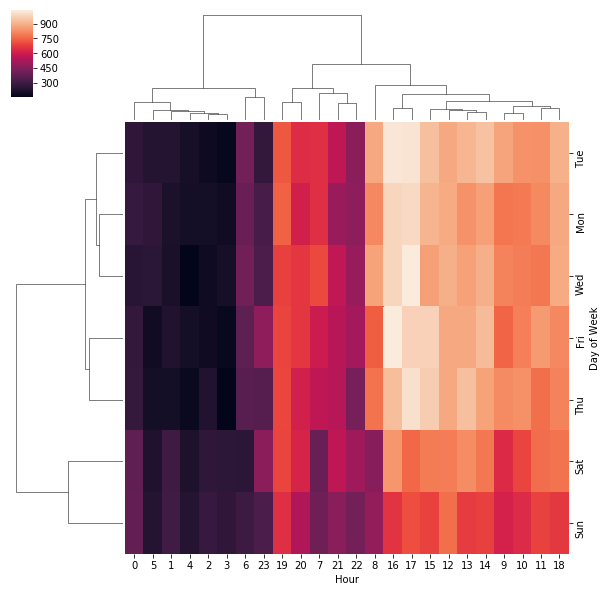

In [243]:
sns.clustermap(mat)

In [244]:
month_mat = df.groupby(['Month','Day of Week']).count()
month_mat = month_mat['desc']

In [248]:
month_mat = month_mat.unstack(level=0)

In [250]:
month_mat.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


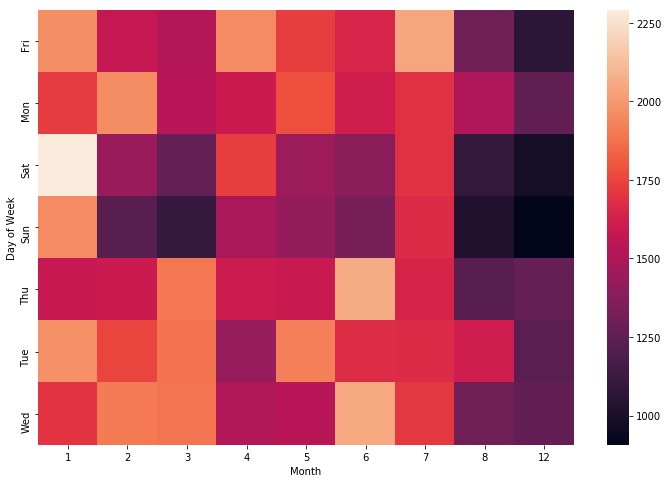

In [252]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(month_mat)

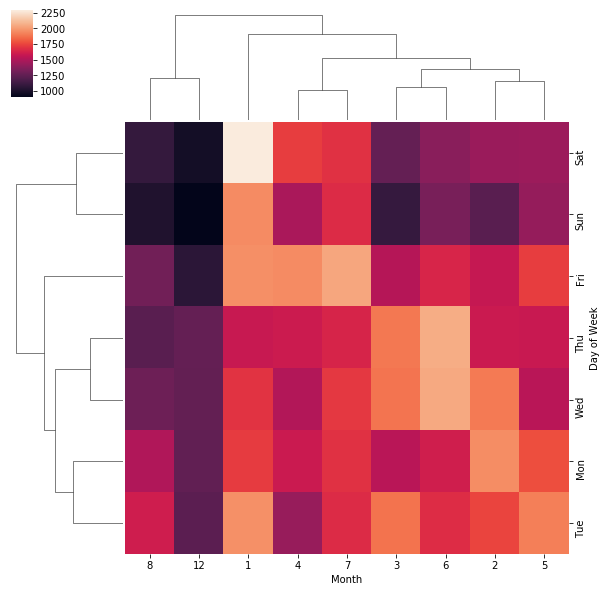

In [253]:
sns.clustermap(month_mat)